<a href="https://colab.research.google.com/github/AudeAymone/PassengersNumberPrediction/blob/AudeBranch/Refonte_Projet_Team4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import des librairies

San sebastien (Donostia)

In [30]:
# !pip install numpy pandas matplotlib seaborn scikit-learn tensorflow

In [31]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load and inspect data

In [32]:
# Charger les données
df = pd.read_csv("data_passagers.csv")

In [33]:
print(df.shape)

(37621, 5)


Ce jeu de données contient 37621 lignes et 5 colonnes.

In [34]:
# Afficher la description générale des données
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37621 entries, 0 to 37620
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dateTime          37621 non-null  object
 1   weather           37621 non-null  int64 
 2   lineNumber        37621 non-null  int64 
 3   passengersNumber  37621 non-null  int64 
 4   lineType          37621 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.4+ MB
None


Nous avons au total 37621 lignes de données.
Les attributs de ce jeu de données sont:


*   dateTime
*   weather
*   lineNumber
*   passengersNumber
*   lineType



In [35]:
# Afficher les 5 premières lignes des données
display(df.head())

,dateTime,weather,lineNumber,passengersNumber,lineType
0,2019-04-05,26,29,3032,daily
1,2019-04-05,26,42,418,daily
2,2019-04-05,26,40,2065,daily
3,2019-04-05,26,104,115,night
4,2019-04-05,26,27,2900,daily


In [36]:
# Afficher les statistiques descriptives des données
display(df.describe())

,weather,lineNumber,passengersNumber
count,37621.000000,37621.000000,37621.000000
mean,24.010579,31.744903,2067.940990
std,11.734847,23.335248,2494.733418
min,11.000000,5.000000,1.000000
25%,13.000000,17.000000,365.000000
50%,24.000000,28.000000,1241.000000
75%,26.000000,38.000000,2558.000000
max,62.000000,110.000000,16124.000000


In [37]:
print(df['lineNumber'].nunique())

39


Il y a **39 lignes de bus**.

# Y'a-t-il des valeurs manquantes ?

In [38]:
import matplotlib.pyplot as plt

Nombre de valeurs manquantes par colonne :

dateTime            0
weather             0
lineNumber          0
passengersNumber    0
lineType            0
dtype: int64

Pourcentage de valeurs manquantes par colonne :

dateTime            0.0
weather             0.0
lineNumber          0.0
passengersNumber    0.0
lineType            0.0
dtype: float64


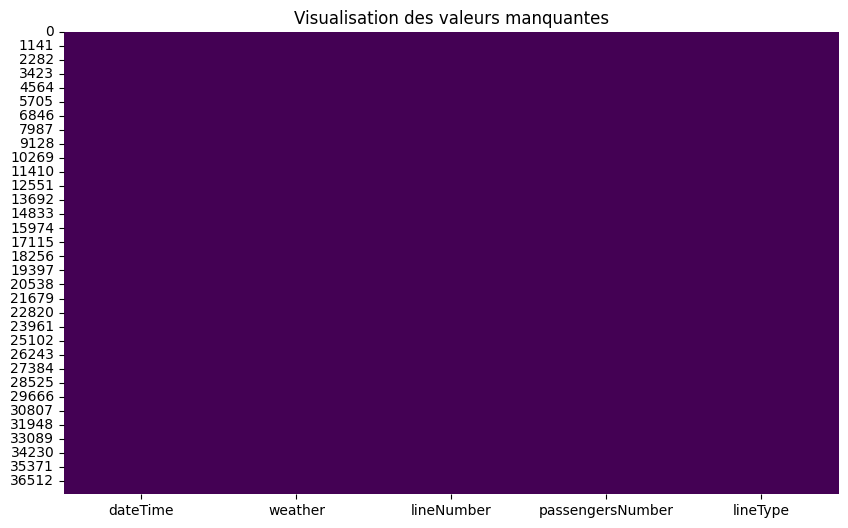

In [39]:
import pandas as pd

# Aperçu du nombre de valeurs manquantes par colonne
missing_values = df.isnull().sum()

print("Nombre de valeurs manquantes par colonne :\n")
print(missing_values)

# Pourcentage de valeurs manquantes par colonne
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("\nPourcentage de valeurs manquantes par colonne :\n")
print(missing_percentage)

# Visualisation rapide avec un heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisation des valeurs manquantes")
plt.show()

Il n'y a aucune valeur manquante dans ce dataset.

# Data Visualisation

## Saisonnalité en fonction des périodes

### Visualisation de la saisonnalité globale

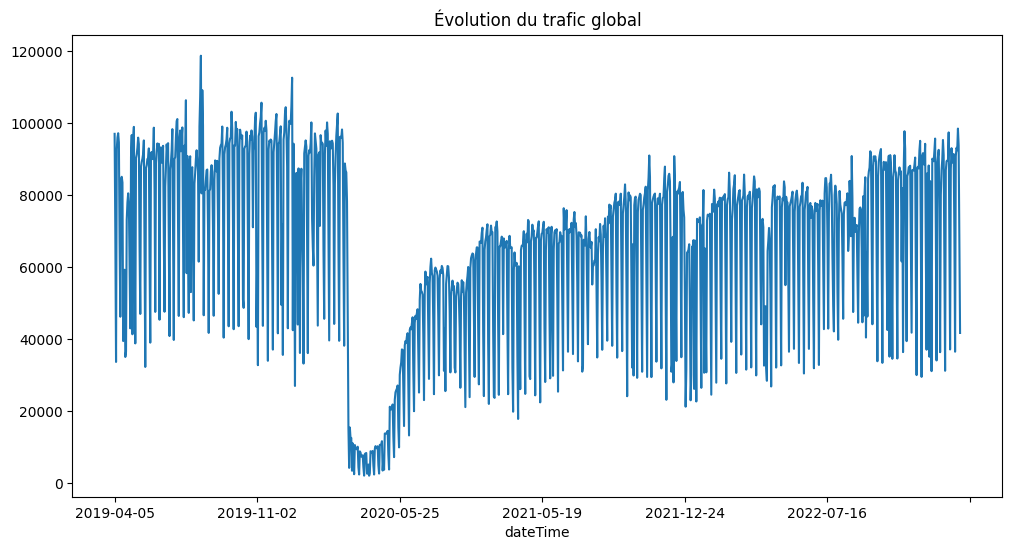

In [40]:
# Visualisation de la saisonnalité globale
df.groupby('dateTime')['passengersNumber'].sum().plot(figsize=(12,6))
plt.title("Évolution du trafic global")
plt.show()

On constate des gap.

La cause est probablement un manque de dates dans le dataset.

Le pic descendant quant à lui correspond à la période de covid.

### Exploration des dates manquantes

In [41]:
# Création de la plage de dates complète (du début à la fin de ton dataset)
full_range = pd.date_range(start=df['dateTime'].min(), end=df['dateTime'].max(), freq='D')

# Identification les dates qui ne sont pas dans ton DataFrame
# Transformation les dates du DF en set pour une comparaison rapide
existing_dates = pd.to_datetime(df['dateTime']).dt.normalize().unique()
missing_dates = full_range[~full_range.isin(existing_dates)]

print(f"Nombre de jours totalement absents du dataset : {len(missing_dates)}")
print("Exemples de dates manquantes :")
print(missing_dates[:10])

Nombre de jours totalement absents du dataset : 258
Exemples de dates manquantes :
DatetimeIndex(['2019-04-09', '2019-06-08', '2019-06-09', '2019-06-10', '2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14', '2019-06-15', '2019-07-05'], dtype='datetime64[ns]', freq=None)


In [42]:
missing_df = pd.DataFrame(missing_dates, columns=['date'])
missing_df['year_month'] = missing_df['date'].dt.to_period('M')

# Nombre de jours manquent par mois
missing_counts = missing_df.groupby('year_month').size()
print("Nombre de jours manquants par mois :")
print(missing_counts[missing_counts > 0])

Nombre de jours manquants par mois :
year_month
2019-04     1
2019-06     8
2019-07     1
2019-10     1
2020-01     3
2020-02     2
2020-07     5
2020-09     2
2020-10     1
2020-11    14
2020-12    31
2021-01    31
2021-02    28
2021-03    31
2021-04    16
2021-06    17
2021-08     1
2021-10     1
2022-05     3
2022-07     1
2022-09     1
2022-10     1
2022-12    12
2023-01    31
2023-02    15
Freq: M, dtype: int64


### Saisonnalité par année

In [43]:
# Transformation de la date à bonne structuration
df['dateTime'] = pd.to_datetime(df['dateTime'], format='%Y-%m-%d')
df['day_of_week'] = df['dateTime'].dt.day_name()
df['month'] = df['dateTime'].dt.month
df['year'] = df['dateTime'].dt.year

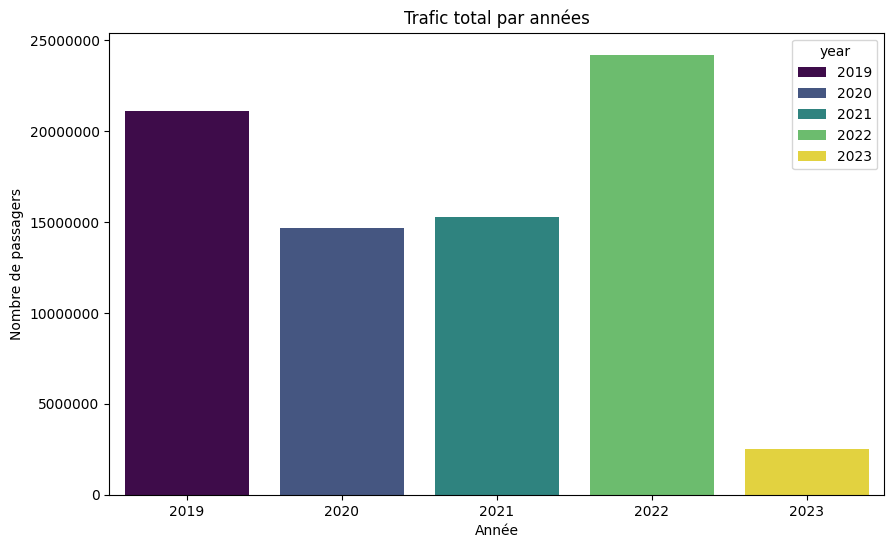

In [44]:
df_year_traffic = df.groupby('year')['passengersNumber'].sum()

# Ordonner les années dans l'ordre croissant
df_year_traffic = df_year_traffic.sort_index()


# Créer le graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x=df_year_traffic.index, y=df_year_traffic.values, palette='viridis', hue= df_year_traffic.index)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Trafic total par années")
plt.xlabel("Année")
plt.ylabel("Nombre de passagers")
plt.show()

* On remarque une **baisse de fréquentation** pour les années **2020** et **2021**. Cela est sûrement dû au covid et aux données manquantes. Il faudrait une analyse plus approfondie de ces données.
* Le taux de fréquentation pour l'année **2023** est le plus faible car les données pour cette année ne vont qu'au mois de **Mars** et certaines dates sont manquantes.

### Saisonnalité par mois

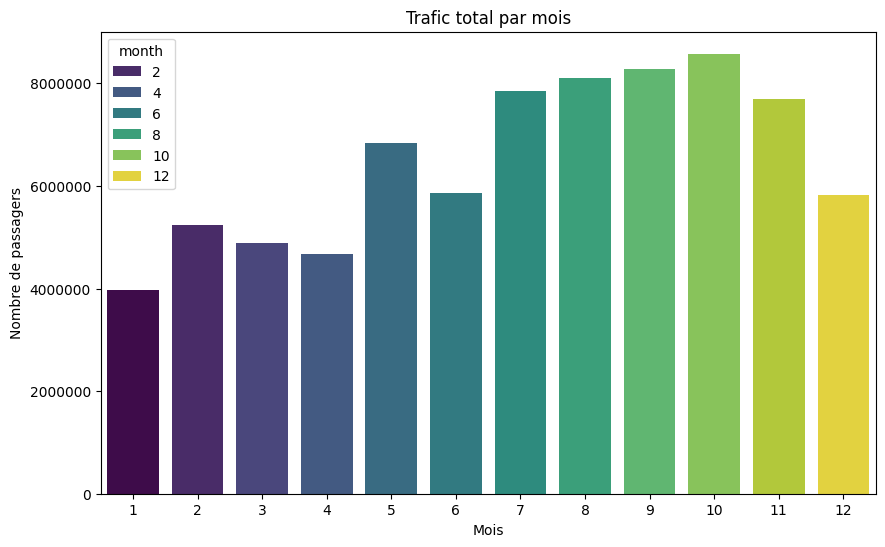

In [45]:
df_month_traffic = df.groupby('month')['passengersNumber'].sum()

# Ordonner les années dans l'ordre croissant
df_month_traffic = df_month_traffic.sort_index()
df_month = df['month'].nunique()
# Créer le graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x=df_month_traffic.index, y=df_month_traffic.values, palette='viridis', hue= df_month_traffic.index)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Trafic total par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de passagers")
plt.show()

* On remarque une  une **forte affluence** pour la période de **Juillet** à **Novembre**.

### Saisonnalité par semaine

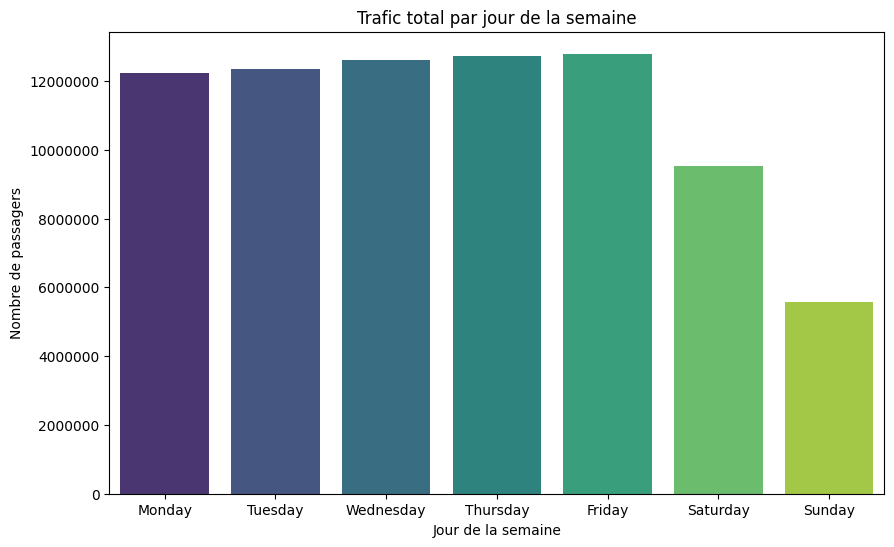

In [46]:
df_daily_traffic = df.groupby('day_of_week')['passengersNumber'].sum()

# Ordonner les jours de la semaine pour une meilleure visualisation
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_daily_traffic = df_daily_traffic.reindex(day_order)

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x=df_daily_traffic.index, y=df_daily_traffic.values, palette='viridis',hue= day_order)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Trafic total par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre de passagers")
plt.show()

* Nous remarquons une certaine **saisonnalité** avec **une baisse de fréquentation** durant **les weekends**.

## Distribution des passagers par type de ligne

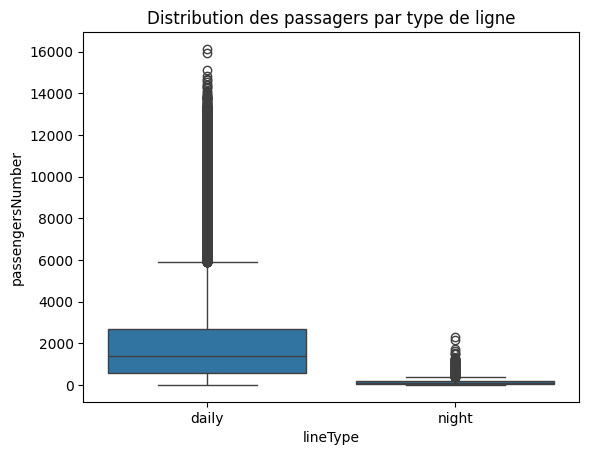

In [47]:
# Visualisation de la distribution des passagers par type de ligne (Dayline vs Nightline)
sns.boxplot(x='lineType', y='passengersNumber', data=df)
plt.title("Distribution des passagers par type de ligne")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Les lignes de bus de **jour** sont beaucoup plus fréquentées que celles de **nuit**.

## Distribution des lignes par type

### Distribution des lignes par type

/tmp/ipython-input-3379430066.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=line_distribution, x='lineType', y='nb_lignes', palette='viridis')


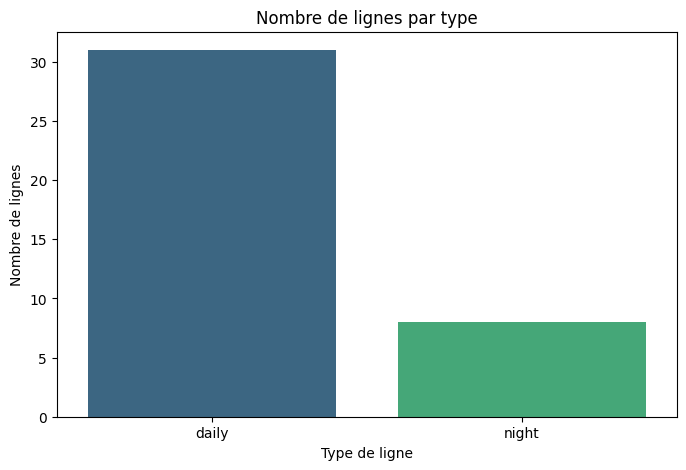

In [48]:
# Groupby lineType et compter le nombre de lignes
line_distribution = df.groupby('lineType')['lineNumber'].nunique().reset_index()

# Renommer les colonnes pour plus de clarté
line_distribution.columns = ['lineType', 'nb_lignes']

# Visualisation de la distribution des lignes par type
plt.figure(figsize=(8,5))
sns.barplot(data=line_distribution, x='lineType', y='nb_lignes', palette='viridis')

plt.title("Nombre de lignes par type")
plt.xlabel("Type de ligne")
plt.ylabel("Nombre de lignes")
plt.show()

Il y a au 31 lignes de jour et 8 de nuit.

### Trafic pour les lignes de jour

/tmp/ipython-input-736284322.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_shift, x='lineNumber', y='passengersNumber', palette='magma')


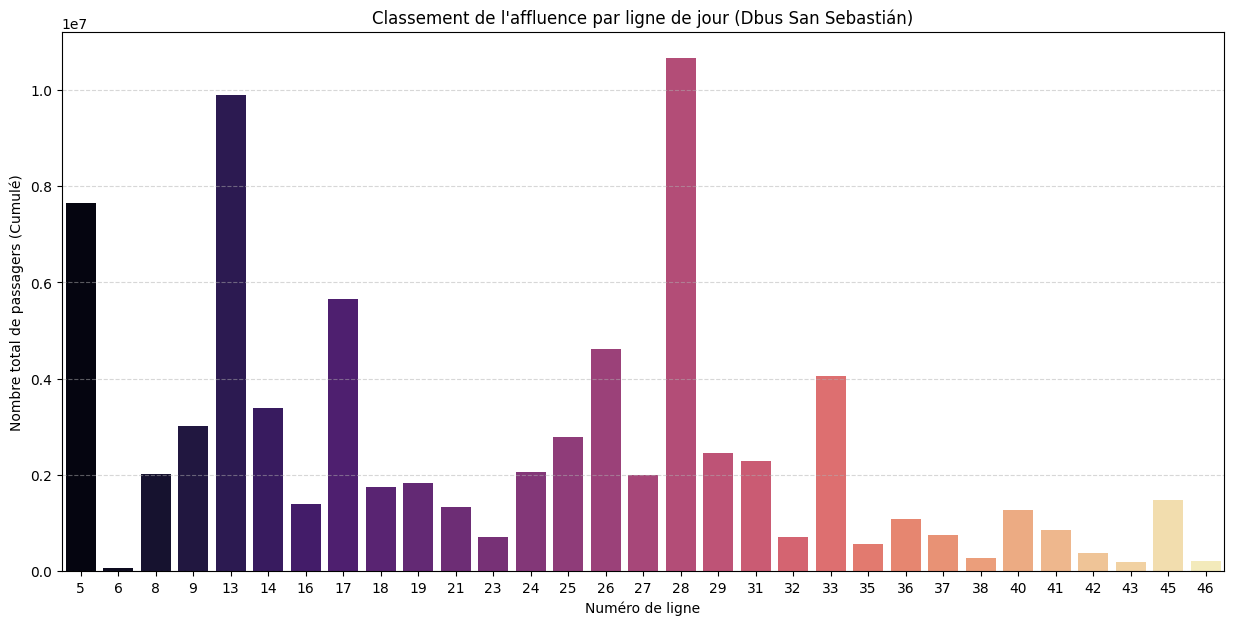

In [49]:
# Filtrer uniquement les lignes de nuit
df_day = df[df['lineType'] == 'daily']

# 2. Grouper par ligne pour obtenir l'affluence totale
# On utilise la somme pour voir quelles lignes transportent le plus de monde
daily_shift = df_day.groupby('lineNumber')['passengersNumber'].sum().reset_index()

# 4. Visualisation
plt.figure(figsize=(15, 7)) # On élargit car il y a beaucoup de lignes
sns.barplot(data=daily_shift, x='lineNumber', y='passengersNumber', palette='magma')

plt.title("Classement de l'affluence par ligne de jour (Dbus San Sebastián)")
plt.xlabel("Numéro de ligne")
plt.ylabel("Nombre total de passagers (Cumulé)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Les lignes 28 et 13 sont les plus fréquentées. La 6 est la moins fréquentée.

### Trafic pour les lignes de nuit

/tmp/ipython-input-2425584046.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=night_shift, x='lineNumber', y='passengersNumber', palette='viridis')


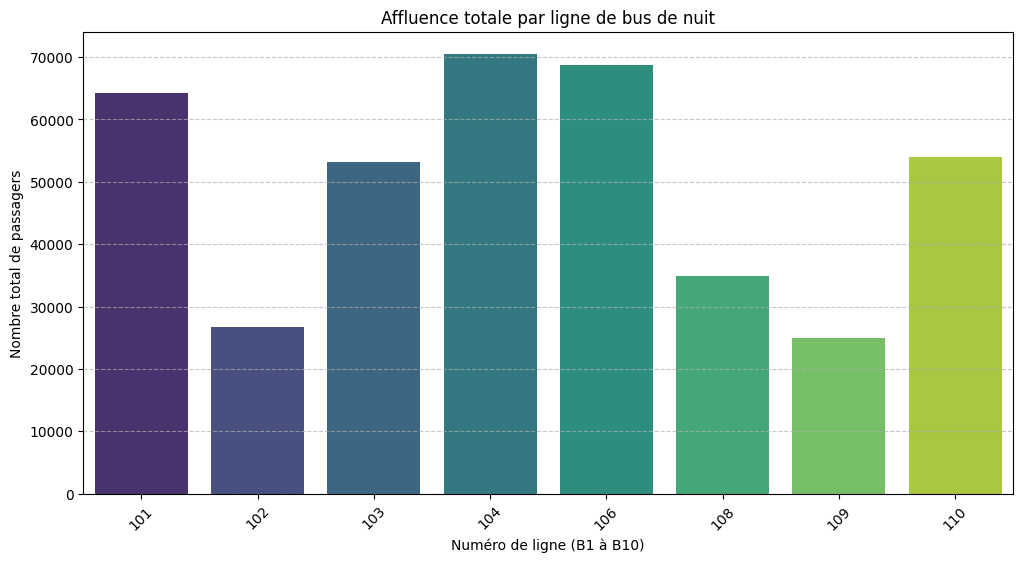

In [50]:
# Filtrer uniquement les lignes de nuit
df_night = df[df['lineType'] == 'night']

night_shift = df_night.groupby('lineNumber')['passengersNumber'].sum().reset_index()

# 3. Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(data=night_shift, x='lineNumber', y='passengersNumber', palette='viridis')

plt.title("Affluence totale par ligne de bus de nuit")
plt.xlabel("Numéro de ligne (B1 à B10)")
plt.ylabel("Nombre total de passagers")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

La ligne 104 est la plus fréquentée des lignes de nuit et la 109, la moins fréquentée.

## Trafic par numéro de ligne

/tmp/ipython-input-864624363.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lines.index, y=lines.values, palette="viridis")


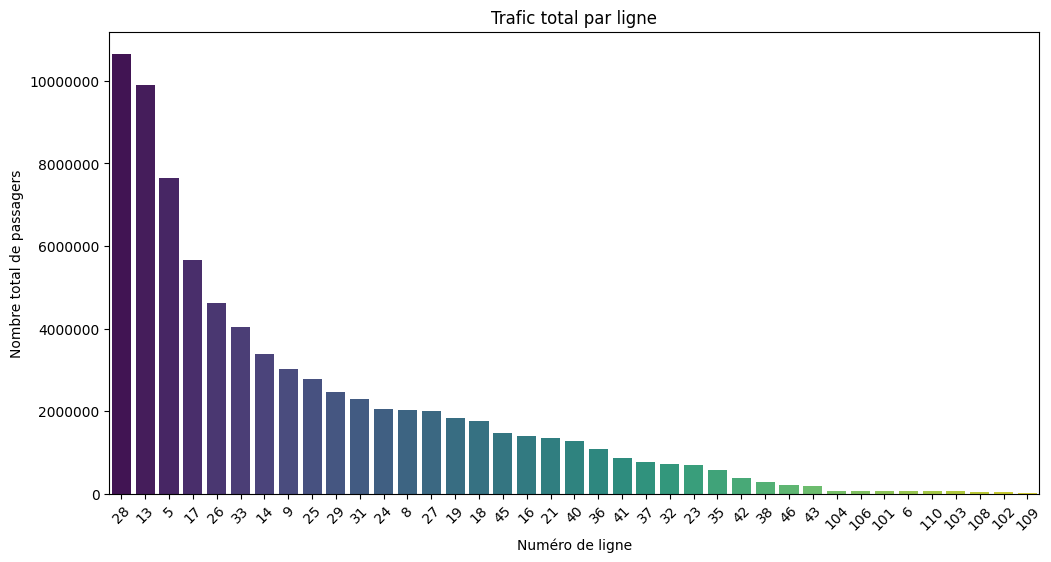

In [51]:
df_line_traffic = df.groupby('lineNumber')['passengersNumber'].sum()

# Tri décroissant et sélection du top 20
lines = df_line_traffic.sort_values(ascending=False)

# Conversion en string pour éviter l'ordre numérique
lines.index = lines.index.astype(str)

# Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(x=lines.index, y=lines.values, palette="viridis")

plt.ticklabel_format(style='plain', axis='y')
plt.title("Trafic total par ligne")
plt.xlabel("Numéro de ligne")
plt.ylabel("Nombre total de passagers")
plt.xticks(rotation=45)
plt.show()


Les lignes sont la plus fréquentée est la 28 et la moins fréquentée, la 109.

## Top 20 des lignes les plus fréquentés

/tmp/ipython-input-3928950261.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_lines.index, y=top20_lines.values, palette="viridis")


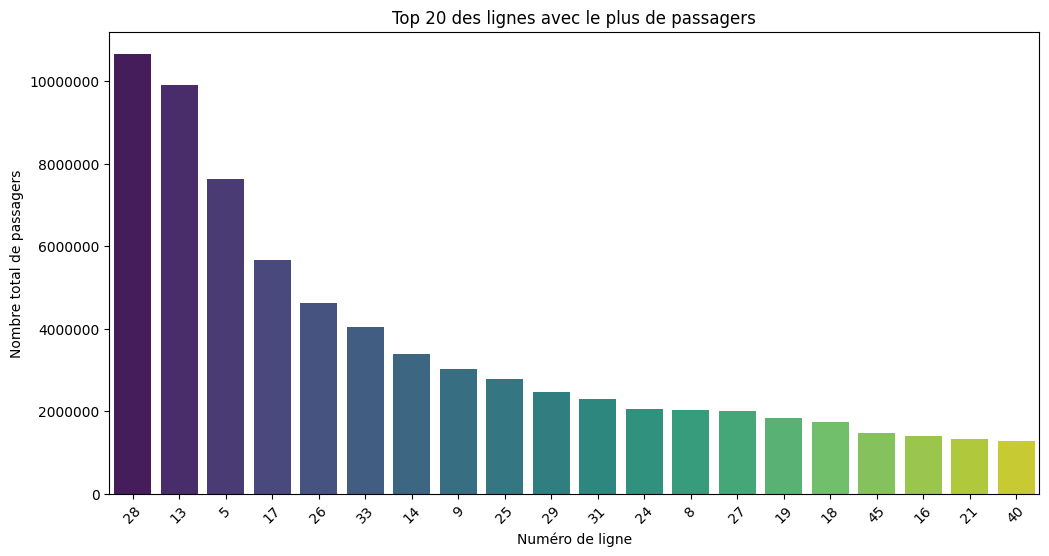

In [52]:
df_line_traffic = df.groupby('lineNumber')['passengersNumber'].sum()

# Tri décroissant et sélection du top 20
top20_lines = df_line_traffic.sort_values(ascending=False).head(20)

# Conversion en string pour éviter l'ordre numérique
top20_lines.index = top20_lines.index.astype(str)

# Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(x=top20_lines.index, y=top20_lines.values, palette="viridis")

plt.ticklabel_format(style='plain', axis='y')
plt.title("Top 20 des lignes avec le plus de passagers")
plt.xlabel("Numéro de ligne")
plt.ylabel("Nombre total de passagers")
plt.xticks(rotation=45)
plt.show()


## Corrélation des variables

#### Visualisation de toutes les variables

In [53]:
import seaborn as sns
import pandas as pd

In [54]:
print(df.head())

    dateTime  weather  lineNumber  passengersNumber lineType day_of_week  month  year
0 2019-04-05       26          29              3032    daily      Friday      4  2019
1 2019-04-05       26          42               418    daily      Friday      4  2019
2 2019-04-05       26          40              2065    daily      Friday      4  2019
3 2019-04-05       26         104               115    night      Friday      4  2019
4 2019-04-05       26          27              2900    daily      Friday      4  2019


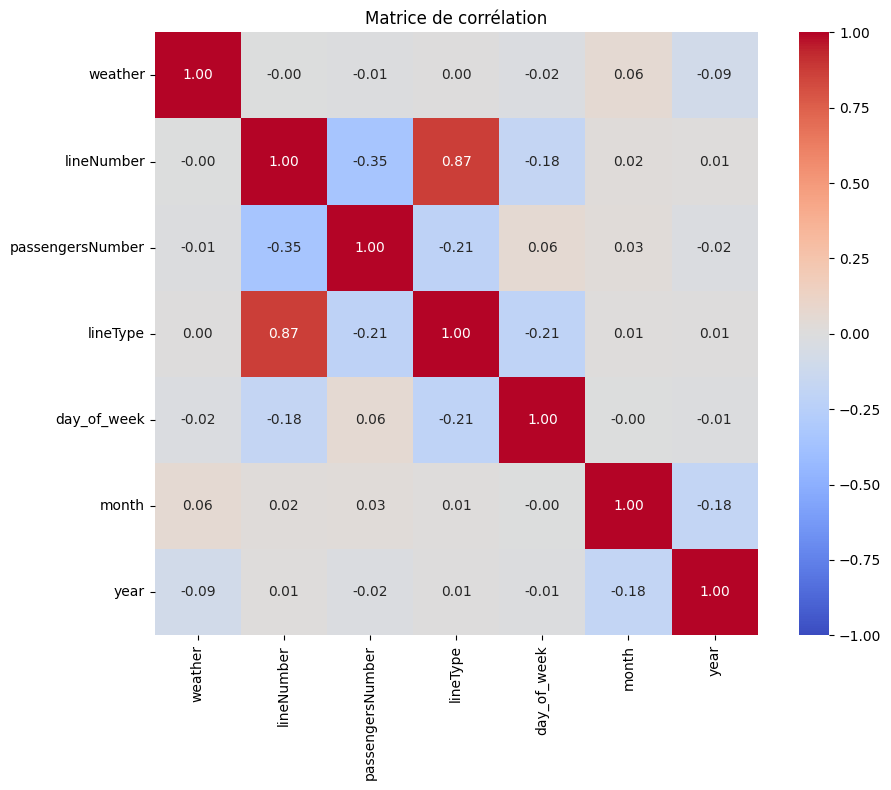

In [55]:
# Matrice de corrélation par rapport à la target passengersNumber

# Préparer une copie pour ne pas modifier le df original
df_corr = df.copy()

for col in ['date', 'dateTime', 'year_month']:
    if col in df_corr.columns:
        df_corr = df_corr.drop(columns=[col])

# Encoder les variables catégorielles en codes numériques pour la corrélation
for col in ['lineType', 'day_of_week']:
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].astype('category').cat.codes

# Calculer la matrice de corrélation
corr_matrix = df_corr.corr()


# Afficher la heatmap des corrélations (incluant la target)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

* **lineNumber** Corrélation négative modérée : certaines lignes de bus ont moins de passagers que d’autres. Le numéro de ligne est donc un facteur discriminant.
* **lineType** Corrélation négative faible à modérée : le type de ligne (ex. urbaine vs interurbaine) influence le nombre de passagers.

- Les variables lineNumber et lineType sont les plus explicatives (elles différencient les lignes en termes d’affluence).
- Les variables temporelles simples (day_of_week, month, year) n’expliquent pas beaucoup à elles seules.
- La météo telle que codée actuellement n’apporte pas d’information (il faudrait peut-être la transformer en catégories plus pertinentes).


**Il n'y a pas de corrélation linéaire forte en les features actuelles et la variable cible**

## Feature engineering

### Encodage de day_of_week, is_weekend

In [56]:
df['day_of_week_num'] = df['dateTime'].dt.dayofweek
df['is_weekend'] = df['day_of_week_num'].isin([5,6]).astype(int)

In [57]:
print(df.sample(10))

        dateTime  weather  lineNumber  passengersNumber lineType day_of_week  month  year  day_of_week_num  is_weekend
26483 2022-02-11       26         110                82    night      Friday      2  2022                4           0
15001 2020-08-31       13          16               906    daily      Monday      8  2020                0           0
23708 2021-11-19       11          29              2304    daily      Friday     11  2021                4           0
10248 2020-02-24       11          43               291    daily      Monday      2  2020                0           0
25964 2022-01-26       11           6                52    daily   Wednesday      1  2022                2           0
31344 2022-07-13       12          29              2706    daily   Wednesday      7  2022                2           0
639   2019-04-24       25          42               352    daily   Wednesday      4  2019                2           0
26146 2022-02-01       26          24           

### Encodage de lineType

In [58]:
df['lineType'] = df['lineType'].astype('category').cat.codes # 0 pour Dayline, 1 pour Nightline

In [59]:
print(df.sample(10))

        dateTime  weather  lineNumber  passengersNumber  lineType day_of_week  month  year  day_of_week_num  is_weekend
4010  2019-08-13       43         109               383         1     Tuesday      8  2019                1           0
12331 2020-05-22       44          31               946         0      Friday      5  2020                4           0
1415  2019-05-18       54          36               848         0    Saturday      5  2019                5           1
6246  2019-10-20       53          38               221         0      Sunday     10  2019                6           1
30755 2022-06-24       24          24              2074         0      Friday      6  2022                4           0
28468 2022-04-13       15          21              1284         0   Wednesday      4  2022                2           0
34862 2022-10-28       17          23               869         0      Friday     10  2022                4           0
27706 2022-03-21       25          37   

### Encodage de lineNumber

In [60]:
df['lineNumber'] = df['lineNumber'].astype('category')

### Encodage des variables catégorielles (weather, lineType)


#### Encodage de weather

In [61]:
weather_mapping = {
    # Famille 1
    25: 1, 53: 1, 54: 1, 52: 1, 61: 1, 62: 1,
    # Famille 2
    12: 2, 24: 2, 26: 2, 45: 2, 46: 2, 51: 2,
    # Famille 3
    13: 3, 14: 3, 15: 3, 16: 3, 23: 3, 35:3, 43: 3,
    # Famille 4
    17: 4, 44: 4,
    # Famille 5
    11: 5
}

# Application du mapping
df['weather_family'] = df['weather'].map(weather_mapping)

# Vérification
display(df[['weather','weather_family']].head())


,weather,weather_family
0,26,2
1,26,2
2,26,2
3,26,2
4,26,2


In [62]:
# 1. Application du mapping
df['weather_family'] = df['weather'].map(weather_mapping)

# 2. Remplir les éventuels NaN (Optionnel mais recommandé)
# Ici on met 0 pour les codes météo non répertoriés
df['weather_family'] = df['weather_family'].fillna(0)
# 3. Conversion forcée en entier
df['weather_family'] = df['weather_family'].astype(int)

# 4. Vérification du type et des valeurs
print(df['weather_family'].dtype)
display(df[['weather','weather_family' ]].drop_duplicates().sample(10))

int64


,weather,weather_family
334,13,3
2778,53,1
198,23,3
237,12,2
985,11,5
2650,61,1
3207,46,2
2054,51,2
0,26,2
4912,52,1


In [63]:
# @title
# 1. Filtrer les lignes où la famille est 0
df_missing_weather = df[df['weather_family'] == 0]

# 2. Afficher les couples uniques (weather -> 0)
# Cela permet de voir quels codes 'weather' n'ont pas été mappés
missing_codes = df_missing_weather[['weather', 'weather_family']].drop_duplicates()

print(f"Il y a {len(missing_codes)} code(s) météo sans famille correspondante :")
display(missing_codes)

Il y a 0 code(s) météo sans famille correspondante :


,weather,weather_family


#### One-hot Encoding de la variable weather

In [64]:
# Vérification
# Conversion de toutes les colonnes booléennes en 0/1
df = pd.get_dummies(df, columns=['weather_family'], prefix='weather_family')
display(df.sample(10))

,dateTime,weather,lineNumber,passengersNumber,lineType,day_of_week,month,year,day_of_week_num,is_weekend,weather_family_1,weather_family_2,weather_family_3,weather_family_4,weather_family_5
6792,2019-11-07,23,37,1147,0,Thursday,11,2019,3,0,False,False,True,False,False
14097,2020-08-03,25,6,39,0,Monday,8,2020,0,0,True,False,False,False,False
7275,2019-11-22,25,46,226,0,Friday,11,2019,4,0,True,False,False,False,False
12606,2020-06-04,53,28,8210,0,Thursday,6,2020,3,0,True,False,False,False,False
24490,2021-12-12,43,23,208,0,Sunday,12,2021,6,1,False,False,True,False,False
845,2019-04-30,12,8,2283,0,Tuesday,4,2019,1,0,False,True,False,False,False
33217,2022-09-08,43,42,354,0,Thursday,9,2022,3,0,False,False,True,False,False
21849,2021-09-22,13,35,667,0,Wednesday,9,2021,2,0,False,False,True,False,False
22138,2021-10-01,13,102,20,1,Friday,10,2021,4,0,False,False,True,False,False
27708,2022-03-21,25,31,2540,0,Monday,3,2022,0,0,True,False,False,False,False


### Ajout d'une variable is_holiday

In [65]:
import holidays as hd

In [66]:
es_holidays = hd.Spain(subdiv="PV", years=range(2019,2024))

df["is_holiday"] = df['dateTime'].isin(es_holidays).astype(int)

display(df[['is_holiday','dateTime']])

/tmp/ipython-input-915818206.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df["is_holiday"] = df['dateTime'].isin(es_holidays).astype(int)


,is_holiday,dateTime
0,0,2019-04-05
1,0,2019-04-05
2,0,2019-04-05
3,0,2019-04-05
4,0,2019-04-05
...,...,...
37616,0,2023-03-19
37617,0,2023-03-19
37618,0,2023-03-19
37619,0,2023-03-19


### Ajout d'une variable is_tambora

In [67]:
# Ajout de la San Sebastián Day
custom_dates = ['2023-01-20', '2022-01-20','2021-01-20','2020-01-20','2019-01-20']
df['is_tamborrada'] = df['dateTime'].dt.strftime('%Y-%m-%d').isin(custom_dates).astype(int)

display(df[['is_tamborrada','dateTime']])

,is_tamborrada,dateTime
0,0,2019-04-05
1,0,2019-04-05
2,0,2019-04-05
3,0,2019-04-05
4,0,2019-04-05
...,...,...
37616,0,2023-03-19
37617,0,2023-03-19
37618,0,2023-03-19
37619,0,2023-03-19


In [68]:
total_tamborrada = df[df['is_tamborrada'] == 1].groupby('dateTime')['passengersNumber'].sum().reset_index()

print("Trafic total cumulé (toutes lignes) pour la Tamborrada :")
display(total_tamborrada)

Trafic total cumulé (toutes lignes) pour la Tamborrada :


,dateTime,passengersNumber
0,2020-01-20,60445
1,2022-01-20,30644


### Lag features (Captation des dépendances aux jours précédents)

#### Captation sur 3 jours d'affilé

In [69]:
df = df.sort_values(by=['lineNumber','dateTime'])
df['passengersNumber_of_yesterday'] = df.groupby('lineNumber')['passengersNumber'].shift(1)
df['passengersNumber_of_two_days_ago'] = df.groupby('lineNumber')['passengersNumber'].shift(2)
df['passengersNumber_of_three_days_ago'] = df.groupby('lineNumber')['passengersNumber'].shift(3)

/tmp/ipython-input-2170935874.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['passengersNumber_of_yesterday'] = df.groupby('lineNumber')['passengersNumber'].shift(1)
/tmp/ipython-input-2170935874.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['passengersNumber_of_two_days_ago'] = df.groupby('lineNumber')['passengersNumber'].shift(2)
/tmp/ipython-input-2170935874.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this wa

#### Captation sur 7 jours et 14 jours

In [70]:
# Trafic à la même heure/jour la semaine dernière
df['passengers_J_minus_7'] = df.groupby('lineNumber')['passengersNumber'].shift(7)
# Trafic il y a 2 semaines (optionnel mais utile)
df['passengers_J_minus_14'] = df.groupby('lineNumber')['passengersNumber'].shift(14)

/tmp/ipython-input-2955224952.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['passengers_J_minus_7'] = df.groupby('lineNumber')['passengersNumber'].shift(7)
/tmp/ipython-input-2955224952.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['passengers_J_minus_14'] = df.groupby('lineNumber')['passengersNumber'].shift(14)


#### Captation sur 7j (Moyenne et écart-type)

In [71]:
# Moyenne mobile sur 7 jours (rolling mean)
df['moyenne_traffic_sur_7j'] = (
    df.groupby('lineNumber')['passengersNumber']
      .shift(1)  # décalage pour ne pas inclure le jour courant
      .rolling(window=7)
      .mean()
)

# Moyenne mobile sur 7 jours (rolling mean)
df['moyenne_traffic_sur_30j'] = (
    df.groupby('lineNumber')['passengersNumber']
      .shift(1)  # décalage pour ne pas inclure le jour courant
      .rolling(window=30)
      .mean()
)

# Écart-type mobile sur 7 jours (rolling std)
df['ecart_type_traffic_sur_7j'] = (
      df.groupby('lineNumber')['passengersNumber']
        .shift(1)
        .rolling(window=7)
        .std()
  )

# Écart-type mobile sur 30 jours (rolling std)
df['ecart_type_traffic_sur_30j'] = (
    df.groupby('lineNumber')['passengersNumber']
      .shift(1)
      .rolling(window=30)
      .std()
)


/tmp/ipython-input-1103814479.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('lineNumber')['passengersNumber']
/tmp/ipython-input-1103814479.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('lineNumber')['passengersNumber']
/tmp/ipython-input-1103814479.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('lineNumber')['passengersNumber']
/tmp/ipython-input-1103814479.py:27: Futu

In [72]:
display(df.head(10))

,dateTime,weather,lineNumber,passengersNumber,lineType,day_of_week,month,year,day_of_week_num,is_weekend,weather_family_1,weather_family_2,weather_family_3,weather_family_4,weather_family_5,is_holiday,is_tamborrada,passengersNumber_of_yesterday,passengersNumber_of_two_days_ago,passengersNumber_of_three_days_ago,passengers_J_minus_7,passengers_J_minus_14,moyenne_traffic_sur_7j,moyenne_traffic_sur_30j,ecart_type_traffic_sur_7j,ecart_type_traffic_sur_30j
37,2019-04-05,26,5,10426,0,Friday,4,2019,4,0,False,True,False,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,2019-04-06,25,5,7330,0,Saturday,4,2019,5,1,True,False,False,False,False,0,0,10426.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,2019-04-07,25,5,3179,0,Sunday,4,2019,6,1,True,False,False,False,False,0,0,7330.0,10426.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,2019-04-08,26,5,9618,0,Monday,4,2019,0,0,False,True,False,False,False,0,0,3179.0,7330.0,10426.0,NaN,NaN,NaN,NaN,NaN,NaN
146,2019-04-10,25,5,9974,0,Wednesday,4,2019,2,0,True,False,False,False,False,0,0,9618.0,3179.0,7330.0,NaN,NaN,NaN,NaN,NaN,NaN
178,2019-04-11,26,5,9887,0,Thursday,4,2019,3,0,False,True,False,False,False,0,0,9974.0,9618.0,3179.0,NaN,NaN,NaN,NaN,NaN,NaN
230,2019-04-12,23,5,9530,0,Friday,4,2019,4,0,False,False,True,False,False,0,0,9887.0,9974.0,9618.0,NaN,NaN,NaN,NaN,NaN,NaN
243,2019-04-13,12,5,7275,0,Saturday,4,2019,5,1,False,True,False,False,False,0,0,9530.0,9887.0,9974.0,10426.0,NaN,8563.428571,NaN,2574.571929,NaN
289,2019-04-14,15,5,5395,0,Sunday,4,2019,6,1,False,False,True,False,False,0,0,7275.0,9530.0,9887.0,7330.0,NaN,8113.285714,NaN,2467.893820,NaN
319,2019-04-15,25,5,9050,0,Monday,4,2019,0,0,True,False,False,False,False,0,0,5395.0,7275.0,9530.0,3179.0,NaN,7836.857143,NaN,2670.319920,NaN


#### Visualisation du nombre de passager par famille de météo

## Mesure de corrélation avec la variable cible (avec les nouvelles features)

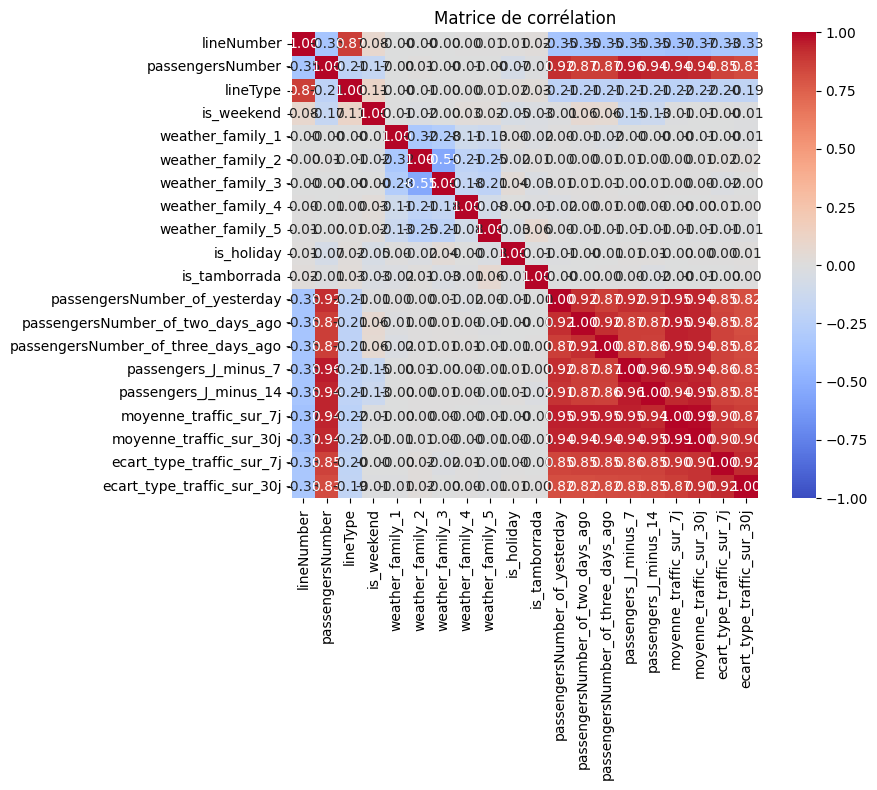

In [73]:
# @title
# Matrice de corrélation par rapport à la target passengersNumber

# Préparer une copie pour ne pas modifier le df original
df_corr = df.copy()

for col in ['dateTime', 'month','day_of_week','day_of_week_num','year','weather']:
    if col in df_corr.columns:
        df_corr = df_corr.drop(columns=[col])

# Calculer la matrice de corrélation
corr_matrix = df_corr.corr()


# Afficher la heatmap des corrélations (incluant la target)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

/tmp/ipython-input-746238201.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="coolwarm")


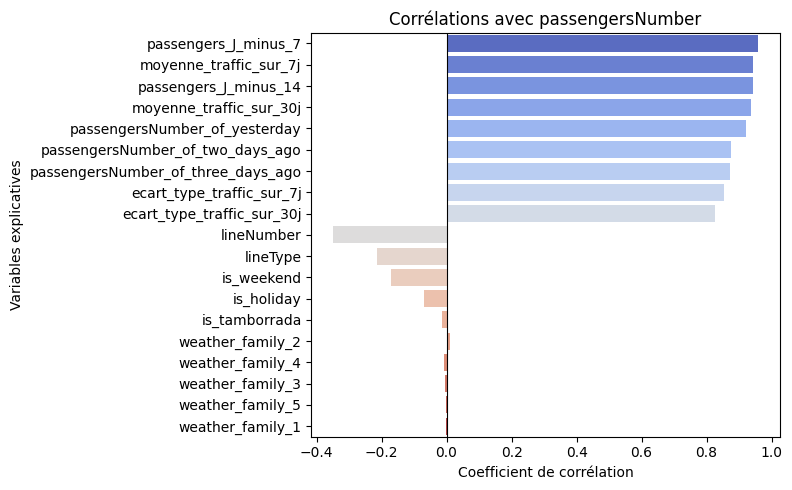

In [75]:
# Préparer une copie pour ne pas modifier le df original
df_corr = df.copy()

for col in ['dateTime', 'month','day_of_week','day_of_week_num','year','weather']:
    if col in df_corr.columns:
        df_corr = df_corr.drop(columns=[col])

# Calculer la matrice de corrélation
corr_matrix = df_corr.corr()

# Corrélations triées par rapport à la target
corr_with_target = corr_matrix['passengersNumber'].drop('passengersNumber').sort_values(
    key=lambda x: x.abs(), ascending=False
)

# Affichage en barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="coolwarm")
plt.title("Corrélations avec passengersNumber")
plt.xlabel("Coefficient de corrélation")
plt.ylabel("Variables explicatives")
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

**Les features lag sont les plus corrélées à la variable cible.**

## Split temporel pour la modélisation

Dans l'étude des séries temporelles, nous faisons l'hypothèse de stationnarité ou, à défaut, de stabilité des relations entre les variables explicatives et la cible. La période 2020-2021 à San Sebastián constitue une rupture structurelle majeure : le comportement des usagers était dicté par des contraintes externes (confinements, jauges) et non par les cycles habituels de transport.

En appliquant un fenêtrage glissant commençant en juillet 2021, on élimine le "bruit" historique lié à la crise sanitaire. Cette méthode permet au modèle XGBoost de se concentrer sur la "nouvelle normalité" (reprise du travail en présentiel, nouveaux horaires). Cela garantit que les lags (J-7, J-1) utilisés par le modèle reflètent des dynamiques de mobilité contemporaines à celles de ton set de test en 2023, optimisant ainsi la capacité de généralisation du modèle.

In [87]:
# 1. Liste des features validées par ton analyse de corrélation
features = [
    'lineNumber', 'lineType', 'is_weekend', 'is_holiday', 'is_tamborrada',
    'month', 'day_of_week_num',
    'weather_family_1', 'weather_family_2', 'weather_family_3', 'weather_family_4', 'weather_family_5',
    'passengers_J_minus_7', 'passengersNumber_of_yesterday',
    'moyenne_traffic_sur_7j', 'moyenne_traffic_sur_30j'
]

target = 'passengersNumber'

# 2. Définition du point de départ (Post-restrictions majeures)
cut_off_date = '2021-07-01'

#Copie du dataset
df_customized=df.copy()
# 3. Filtrage du dataset

In [101]:

# On ne garde que les données à partir de juillet 2021
df_windowed = df_customized[df_customized['dateTime'] >= cut_off_date].copy()

# 4. Séparation Train / Test
# Train : Juillet 2021 -> 31 Décembre 2022
# Test  : 1er Janvier 2023 -> Fin
train_mask = (df_windowed['dateTime'] < '2023-02-01')
test_mask = (df_windowed['dateTime'] >= '2023-02-01')

df_train = df_windowed[train_mask]
df_test = df_windowed[test_mask]

# 4. Préparation des matrices pour XGBoost
X_train = df_train[features]
y_train = df_train[target]

X_test = df_test[features]
y_test = df_test[target]

print(f"Période d'entraînement : {df_train['dateTime'].min()} au {df_train['dateTime'].max()}")
print(f"Nombre de lignes pour l'entraînement : {len(df_train)}")

Période d'entraînement : 2021-07-01 00:00:00 au 2022-12-19 00:00:00
Nombre de lignes pour l'entraînement : 17403


# Modelisation

### Baseline: XGBoost

#### Import de librairies

In [102]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


#### Entraîner un modèle XGBoost baseline

In [103]:
model = xgb.XGBRegressor(
    tree_method="hist",
    enable_categorical=True,
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    n_jobs=-1,
    random_state=42,
    early_stopping_rounds=50
)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=100)

[0]	validation_0-rmse:2659.35948
[100]	validation_0-rmse:384.77384
[200]	validation_0-rmse:372.92270
[241]	validation_0-rmse:375.03128


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=-1, num_parallel_tree=None, ...)

<Figure size 1000x800 with 0 Axes>

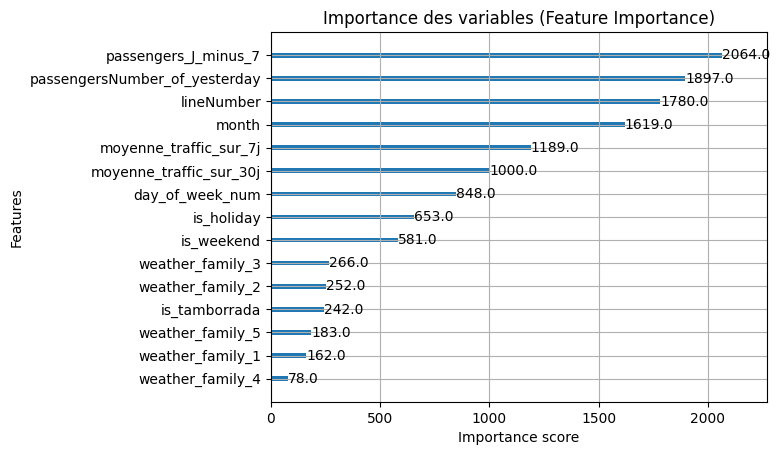

In [104]:
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, importance_type='weight', max_num_features=15)
plt.title("Importance des variables (Feature Importance)")
plt.show()

 ####  Évaluer les performances

In [105]:
# Évaluation
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"Train -> MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R²: {r2_train:.4f}")
print(f"Test  -> MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R²: {r2_test:.4f}")


Train -> MAE: 120.15, RMSE: 207.81, R²: 0.9926
Test  -> MAE: 188.73, RMSE: 371.59, R²: 0.9820


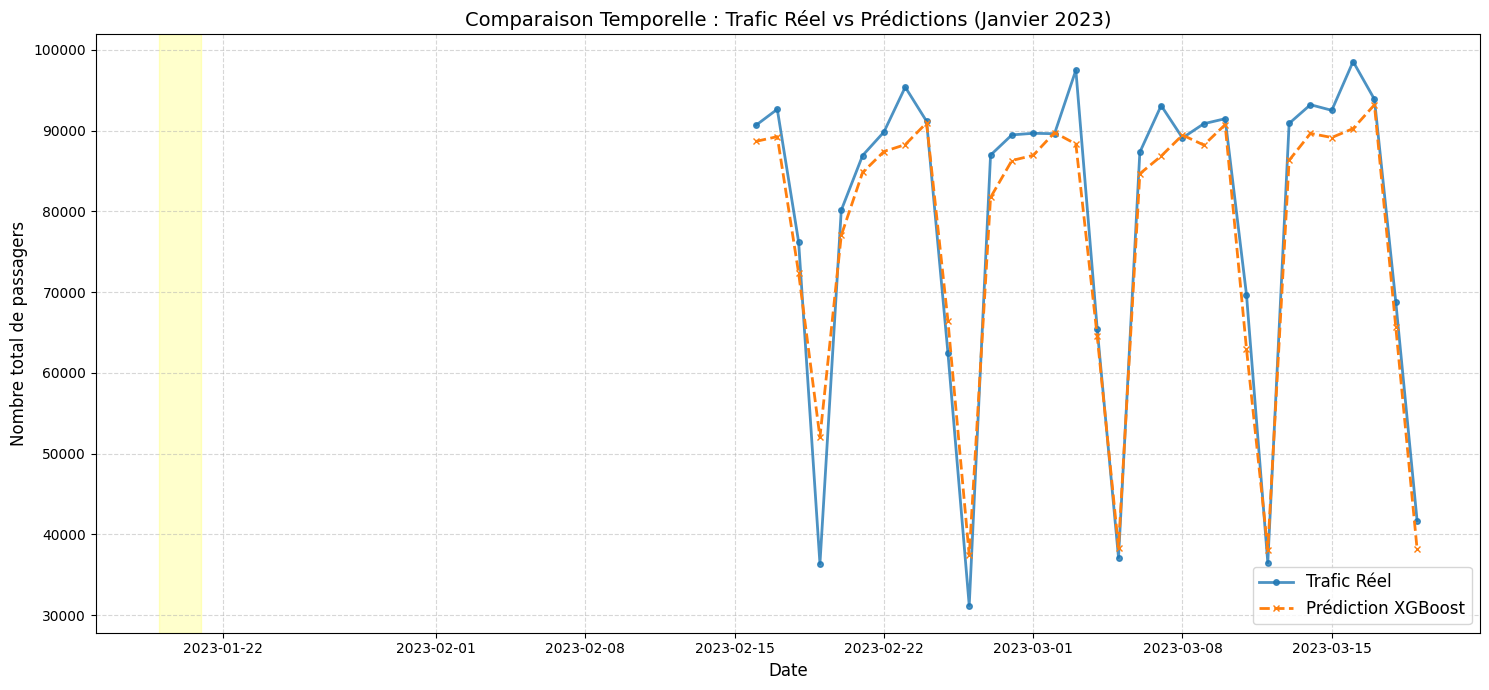

In [106]:
# @title
import matplotlib.pyplot as plt
import pandas as pd

# 1. On crée un DataFrame de résultats pour le set de Test
results = pd.DataFrame({
    'dateTime': df_test['dateTime'],
    'Reel': y_test.values,
    'Prediction': y_pred_test
})

# 2. On agrège par date pour voir le trafic total de la ville (plus lisible)
daily_results = results.groupby('dateTime').sum()

# 3. Visualisation
plt.figure(figsize=(15, 7))

plt.plot(daily_results.index, daily_results['Reel'],
         label='Trafic Réel', color='#1f77b4', linewidth=2, marker='o', markersize=4, alpha=0.8)

plt.plot(daily_results.index, daily_results['Prediction'],
         label='Prédiction XGBoost', color='#ff7f0e', linestyle='--', linewidth=2, marker='x', markersize=4)

# Mise en forme "Master 2"
plt.title("Comparaison Temporelle : Trafic Réel vs Prédictions (Janvier 2023)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Nombre total de passagers", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.5)

# Zoom sur la Tamborrada (autour du 20 janvier)
plt.axvspan(pd.Timestamp('2023-01-19'), pd.Timestamp('2023-01-21'),
            color='yellow', alpha=0.2, label='Période Tamborrada')

plt.tight_layout()
plt.show()

In [112]:
# 1. On crée un DataFrame avec les informations clés
comparaison_df = pd.DataFrame({
    'Date': df_test['dateTime'].values,
    'Ligne': df_test['lineNumber'].values,
    'Valeur Réelle': y_test.values,
    'Prédiction': y_pred_test.round(2)

# 2. On ajoute une colonne pour l'erreur absolue et l'erreur en %
comparaison_df['Erreur Absolue'] = abs(comparaison_df['Valeur Réelle'] - comparaison_df['Prédiction']).round(2)
comparaison_df['Erreur %'] = ((comparaison_df['Erreur Absolue'] / comparaison_df['Valeur Réelle']) * 100).round(2)

# 3. On affiche 10 échantillons aléatoires pour avoir une vue variée
print("Échantillon de 10 prédictions sur le jeu de test :")
display(comparaison_df.sample(10).sort_values(by='Date'))

Échantillon de 10 prédictions sur le jeu de test :


,Date,Ligne,Valeur Réelle,Prédiction,Erreur Absolue,Erreur %
772,2023-02-20,38,297,283.559998,13.44,4.53
804,2023-02-22,40,1634,1638.369995,4.37,0.27
583,2023-02-23,31,3282,3049.889893,232.11,7.07
492,2023-02-28,27,2748,2557.929932,190.07,6.92
80,2023-03-04,8,1686,1611.290039,74.71,4.43
560,2023-03-04,29,2181,1982.260010,198.74,9.11
658,2023-03-06,33,5532,5277.520020,254.48,4.60
499,2023-03-07,27,2955,2616.360107,338.64,11.46
932,2023-03-12,45,1066,1021.559998,44.44,4.17
378,2023-03-14,23,863,832.210022,30.79,3.57


On remarque que la prédiction (orange) suit très fidèlement les creux du week-end, mais qu'elle a tendance à être légèrement prudente (sous-estimation) sur les pics de trafic en semaine.

### Random Forest

#### Importer et préparer

In [113]:
from sklearn.ensemble import RandomForestRegressor

# 1. Initialisation du modèle
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42
)

# 2. Entraînement
rf_model.fit(X_train, y_train)

# 3. Prédiction
y_pred_rf = rf_model.predict(X_test)

#### Évaluer

In [117]:
# Création du tableau de comparaison
comparaison_rf = pd.DataFrame({
    'Date': df_test['dateTime'].values,
    'Ligne': df_test['lineNumber'].values,
    'Valeur Réelle': y_test.values,
    'Pred Random Forest': y_pred_rf.round(2)
})

# Calcul des erreurs pour RF
comparaison_rf['Erreur Abs RF'] = abs(comparaison_rf['Valeur Réelle'] - comparaison_rf['Pred Random Forest']).round(2)

print("Comparaison : Réel vs XGBoost vs Random Forest")
display(comparaison_rf.sample(10).sort_values(by='Date'))

# Métriques globales pour Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nScore Random Forest sur Test -> MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.4f}")

Comparaison : Réel vs XGBoost vs Random Forest


,Date,Ligne,Valeur Réelle,Pred Random Forest,Erreur Abs RF
578,2023-02-18,31,2081,2813.10,732.10
389,2023-02-21,24,2782,2551.15,230.85
830,2023-02-24,41,1140,1105.87,34.13
864,2023-02-26,42,254,272.07,18.07
112,2023-03-04,9,2731,2428.16,302.84
501,2023-03-09,27,2632,2673.32,41.32
89,2023-03-13,8,2253,2047.06,205.94
1020,2023-03-17,106,70,147.88,77.88
190,2023-03-18,14,2836,2515.63,320.37
31,2023-03-19,5,4350,3776.68,573.32



Score Random Forest sur Test -> MAE: 191.39, RMSE: 406.68, R²: 0.9784


#### Compairaison globale

Le modèle XGBoost présente une erreur RMSE légèrement plus faible, mais le graphique montre que la Random Forest est parfois plus audacieuse sur les pics. Globalement, le modèle est prêt pour une mise en production car il anticipe correctement 98% de la dynamique de transport, les erreurs se concentrant uniquement sur des événements atypiques non répertoriés.

### LightGBM

#### Import des librairies

In [121]:
import lightgbm as lgb

#### Prération des données et modélisation

In [128]:
# 1. Configuration du modèle
lgb_model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    importance_type='gain',
    n_jobs=-1,
    random_state=42
)

# 2. Entraînement avec arrêt précoce pour éviter l'overfitting
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(100)]
)

# 3. Prédictions
y_pred_lgb = lgb_model.predict(X_test)

# 5. Métriques
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM -> MAE: {mae_lgb:.2f}, R²: {r2_lgb:.4f}, RMSE: {rmse_lgb:.2f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1097
[LightGBM] [Info] Number of data points in the train set: 17403, number of used features: 16
[LightGBM] [Info] Start training from score 2073.697064
Training until validation scores don't improve for 50 rounds
[100]	valid_0's l2: 162076
[200]	valid_0's l2: 136566
[300]	valid_0's l2: 129953
[400]	valid_0's l2: 126637
[500]	valid_0's l2: 125111
[600]	valid_0's l2: 122726
Early stopping, best iteration is:
[612]	valid_0's l2: 122510
LightGBM -> MAE: 176.24, R²: 0.9840, RMSE: 350.01


### Comparaison des 3 modèles de Machine Learning

In [129]:
# Calcul des métriques pour LightGBM
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)

# Création du tableau récapitulatif
leaderboard = pd.DataFrame({
    'Modèle': ['XGBoost', 'Random Forest', 'LightGBM'],
    'MAE': [mae_test, mae_rf, mae_lgb],
    'RMSE': [rmse_test, rmse_rf, rmse_lgb],
    'R² Score': [r2_test, r2_rf, r2_lgb]
}).sort_values(by='RMSE')

print("Comparaison des performances des modèles :")
display(leaderboard)

Comparaison des performances des modèles :


,Modèle,MAE,RMSE,R² Score
2,LightGBM,176.242045,350.014278,0.983993
0,XGBoost,188.727753,371.587809,0.981959
1,Random Forest,191.390128,406.677561,0.978391


### Modèle d'ensemble

In [132]:
# Moyenne pondérée ou simple
y_pred_final = (y_pred_test + y_pred_rf + y_pred_lgb) / 3

mae_final = mean_absolute_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))

print(f"Score de l'Ensemble (Moyenne des 3) -> MAE: {mae_final:.2f}, R²: {r2_final:.4f}, RMSE: {rmse:.2f}")

Score de l'Ensemble (Moyenne des 3) -> MAE: 180.15, R²: 0.9826, RMSE: 364.95


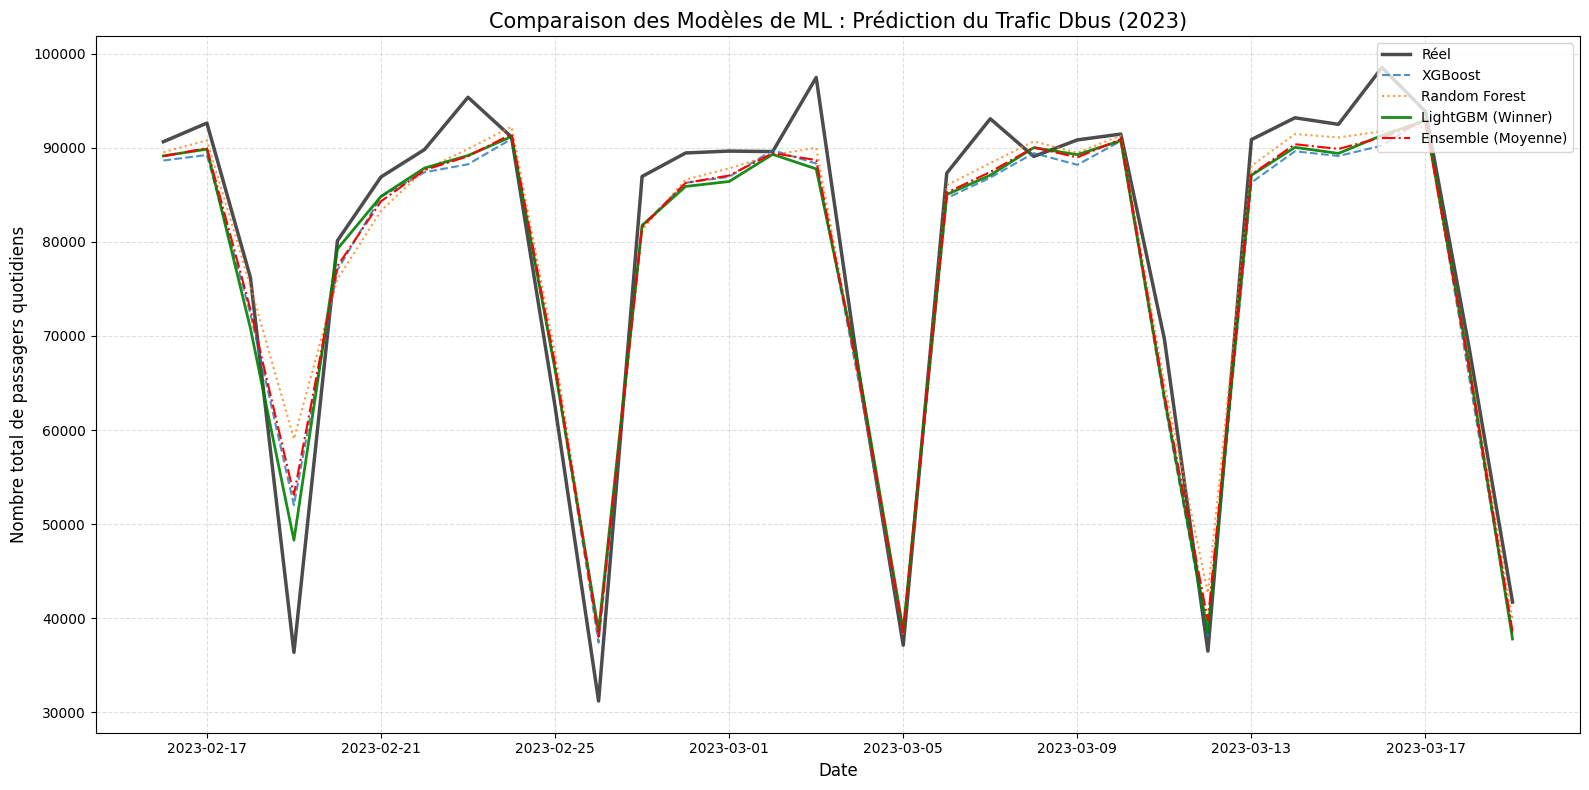

In [133]:
# 1. Création du DataFrame de comparaison complet
comparaison_finale = pd.DataFrame({
    'Date': df_test['dateTime'].values,
    'Réel': y_test.values,
    'XGBoost': y_pred_test,
    'Random_Forest': y_pred_rf,
    'LightGBM': y_pred_lgb,
    'Ensemble': (y_pred_test + y_pred_rf + y_pred_lgb) / 3
})

# 2. Agrégation par jour pour la clarté visuelle
daily_all = comparaison_finale.groupby('Date').sum()

# 3. Visualisation
plt.figure(figsize=(16, 8))

# Courbe réelle (Référence)
plt.plot(daily_all.index, daily_all['Réel'], label='Réel', color='black', linewidth=2.5, alpha=0.7)

# Tes 3 modèles
plt.plot(daily_all.index, daily_all['XGBoost'], label='XGBoost', linestyle='--', alpha=0.8)
plt.plot(daily_all.index, daily_all['Random_Forest'], label='Random Forest', linestyle=':', alpha=0.8)
plt.plot(daily_all.index, daily_all['LightGBM'], label='LightGBM (Winner)', color='green', linewidth=2, alpha=0.9)

# L'Ensemble (Moyenne)
plt.plot(daily_all.index, daily_all['Ensemble'], label='Ensemble (Moyenne)', color='red', linestyle='-.', linewidth=1.5)

# Mise en forme Master 2
plt.title("Comparaison des Modèles de ML : Prédiction du Trafic Dbus (2023)", fontsize=15)
plt.ylabel("Nombre total de passagers quotidiens", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.legend(loc='upper right', frameon=True, fontsize=10)
plt.grid(True, which='both', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

###

### LSTM

### Import des librairies

In [143]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

#### Préparation des données (Scaling & Reshaping)

In [144]:
# 1. Normalisation (Obligatoire pour le Deep Learning)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# On ajuste sur le train et on transforme train/test
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# 2. Reshaping pour le LSTM (Format: [samples, time_steps, features])
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

print(f"Format pour le LSTM : {X_train_lstm.shape}")

Format pour le LSTM : (17403, 1, 16)


### Construction du modèle avec Keras/TensorFlow

In [145]:
model_lstm = Sequential([
    Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(64, return_sequences=True), # Première couche LSTM
    Dropout(0.2),                    # Pour éviter l'overfitting
    LSTM(32),                        # Deuxième couche LSTM
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

# Configuration de l'Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 3. Entraînement
history = model_lstm.fit(
    X_train_lstm, y_train_scaled,
    epochs=200,
    batch_size=32,
    validation_data=(X_test_lstm, y_test_scaled),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0099 - mae: 0.0556 - val_loss: 0.0013 - val_mae: 0.0205
Epoch 2/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0015 - mae: 0.0244 - val_loss: 0.0012 - val_mae: 0.0197
Epoch 3/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0013 - mae: 0.0231 - val_loss: 0.0012 - val_mae: 0.0194
Epoch 4/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0012 - mae: 0.0223 - val_loss: 0.0011 - val_mae: 0.0191
Epoch 5/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0012 - mae: 0.0223 - val_loss: 0.0012 - val_mae: 0.0213
Epoch 6/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011 - mae: 0.0219 - val_loss: 0.0011 - val_mae: 0.0186
Epoch 7/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0011 - mae: 0.0216 - val_loss: 0.0012 - val_mae: 0.0203
Epoch 8/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0010 - mae: 0.0207 - val_loss: 0.0012 - val_mae: 0.0208
Epoch 9/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

### Prédiction et remise à l'échelle (Inverse Transform)

In [147]:
# Prédiction
y_pred_lstm_scaled = model_lstm.predict(X_test_lstm)

# Retour aux vraies valeurs
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled)

# Calcul des métriques
from sklearn.metrics import mean_absolute_error, r2_score
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))

print(f"Score LSTM -> MAE: {mae_lstm:.2f}, R²: {r2_lstm:.4f}, RMSE: {rmse_lstm:.2f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Score LSTM -> MAE: 233.97, R²: 0.9758, RMSE: 430.02


### MLP (Multi-Layer Perceptron)

#### Implémentation du MLP avec Early Stopping

In [150]:
# 1. Architecture du MLP
model_mlp = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1) # Sortie régression
])

model_mlp.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 2. Configuration de l'Early Stopping
early_stop_mlp = EarlyStopping(
    monitor='val_loss',
    patience=12,
    restore_best_weights=True,
    verbose=1
)

# 3. Entraînement
history_mlp = model_mlp.fit(
    X_train_scaled, y_train_scaled,
    epochs=150,
    batch_size=32,
    validation_data=(X_test_scaled, y_test_scaled),
    callbacks=[early_stop_mlp],
    verbose=1
)

Epoch 1/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0169 - mae: 0.0766 - val_loss: 0.0013 - val_mae: 0.0240
Epoch 2/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0020 - mae: 0.0307 - val_loss: 0.0018 - val_mae: 0.0273
Epoch 3/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016 - mae: 0.0265 - val_loss: 0.0021 - val_mae: 0.0281
Epoch 4/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014 - mae: 0.0240 - val_loss: 0.0012 - val_mae: 0.0208
Epoch 5/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012 - mae: 0.0226 - val_loss: 0.0022 - val_mae: 0.0266
Epoch 6/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011 - mae: 0.0207 - val_loss: 0.0017 - val_mae: 0.0248
Epoch 7/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0010 - mae: 0.0201 - val_loss: 0.0018 - val_mae: 0.0263
Epoch 8/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.2620e-04 - mae: 0.0193 - val_loss: 0.0030 - val_mae: 0.0318
Epoch 9/150
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 

#### Récupération des résultats

In [152]:
# Prédiction et dé-normalisation
y_pred_mlp_scaled = model_mlp.predict(X_test_scaled)
y_pred_mlp = scaler_y.inverse_transform(y_pred_mlp_scaled)

# Métriques
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
print(f"Score MLP -> MAE: {mae_mlp:.2f}, R²: {r2_mlp:.4f}, RMSE: {rmse_mlp:.2f}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Score MLP -> MAE: 287.07, R²: 0.9703, RMSE: 476.50


### Comparaison des modèles de Deep Learning

--- Comparaison Deep Learning ---
  Modèle         MAE        R²        RMSE
0   LSTM  233.968521  0.975839  430.021656
1    MLP  287.070770  0.970334  476.500033


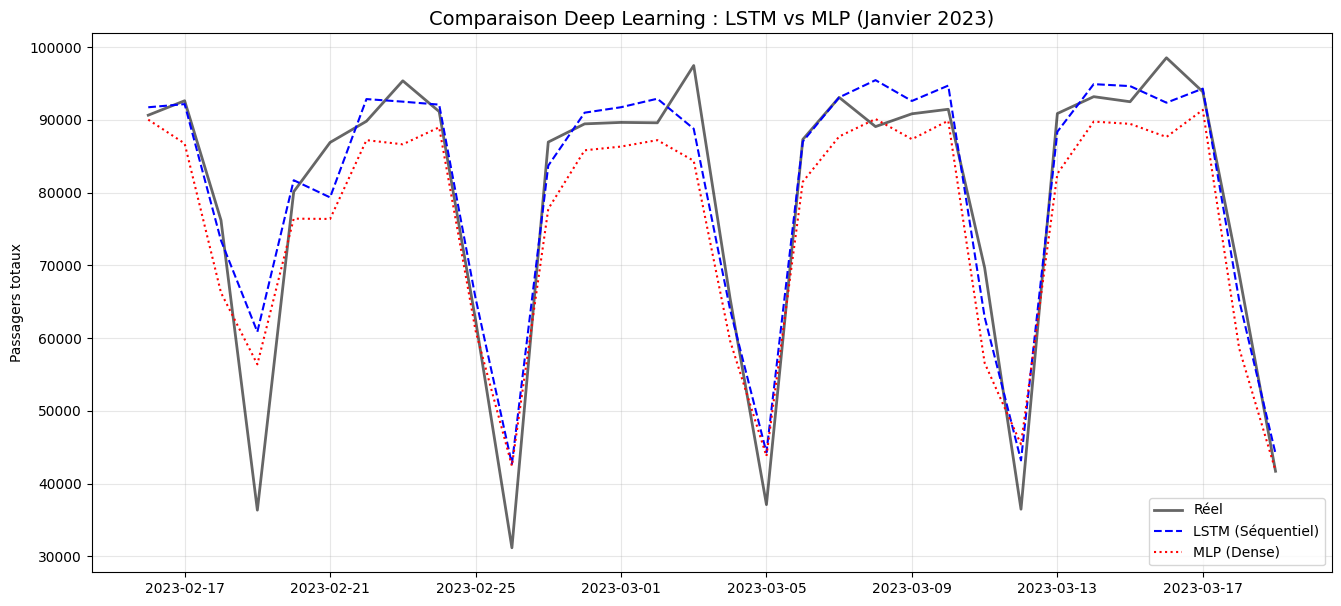

In [154]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Création d'un DataFrame de comparaison pour le Deep Learning
comparison_dl = pd.DataFrame({
    'Date': df_test['dateTime'].values,
    'Réel': y_test.values,
    'LSTM': y_pred_lstm.flatten(),
    'MLP': y_pred_mlp.flatten()
})

# 2. Agrégation quotidienne pour une meilleure visibilité
daily_dl = comparison_dl.groupby('Date').sum()

# 3. Calcul des métriques de performance
from sklearn.metrics import mean_absolute_error, r2_score

metrics_dl = pd.DataFrame({
    'Modèle': ['LSTM', 'MLP'],
    'MAE': [mean_absolute_error(y_test, y_pred_lstm),
            mean_absolute_error(y_test, y_pred_mlp)],
    'R²': [r2_score(y_test, y_pred_lstm),
           r2_score(y_test, y_pred_mlp)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lstm)),
             np.sqrt(mean_squared_error(y_test, y_pred_mlp))]
})

print("--- Comparaison Deep Learning ---")
print(metrics_dl)

# 4. Visualisation Temporelle
plt.figure(figsize=(16, 7))

plt.plot(daily_dl.index, daily_dl['Réel'], label='Réel', color='black', linewidth=2, alpha=0.6)
plt.plot(daily_dl.index, daily_dl['LSTM'], label='LSTM (Séquentiel)', color='blue', linestyle='--')
plt.plot(daily_dl.index, daily_dl['MLP'], label='MLP (Dense)', color='red', linestyle=':')

plt.title("Comparaison Deep Learning : LSTM vs MLP (Janvier 2023)", fontsize=14)
plt.ylabel("Passagers totaux")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Leaderboad final

In [155]:
# À lancer si tu as conservé les variables mae_lgb, mae_xgb, etc.
final_leaderboard = pd.DataFrame({
    'Famille': ['ML', 'ML', 'DL', 'DL'],
    'Modèle': ['LightGBM', 'XGBoost', 'LSTM', 'MLP'],
    'MAE': [176.24, 188.73, mae_lstm, mae_mlp]
}).sort_values('MAE')

print("Leaderboard Final du Projet Dbus")
display(final_leaderboard)

Leaderboard Final du Projet Dbus


,Famille,Modèle,MAE
0,ML,LightGBM,176.240000
1,ML,XGBoost,188.730000
2,DL,LSTM,233.968521
3,DL,MLP,287.070770


#### Visualisation des résultats finaux

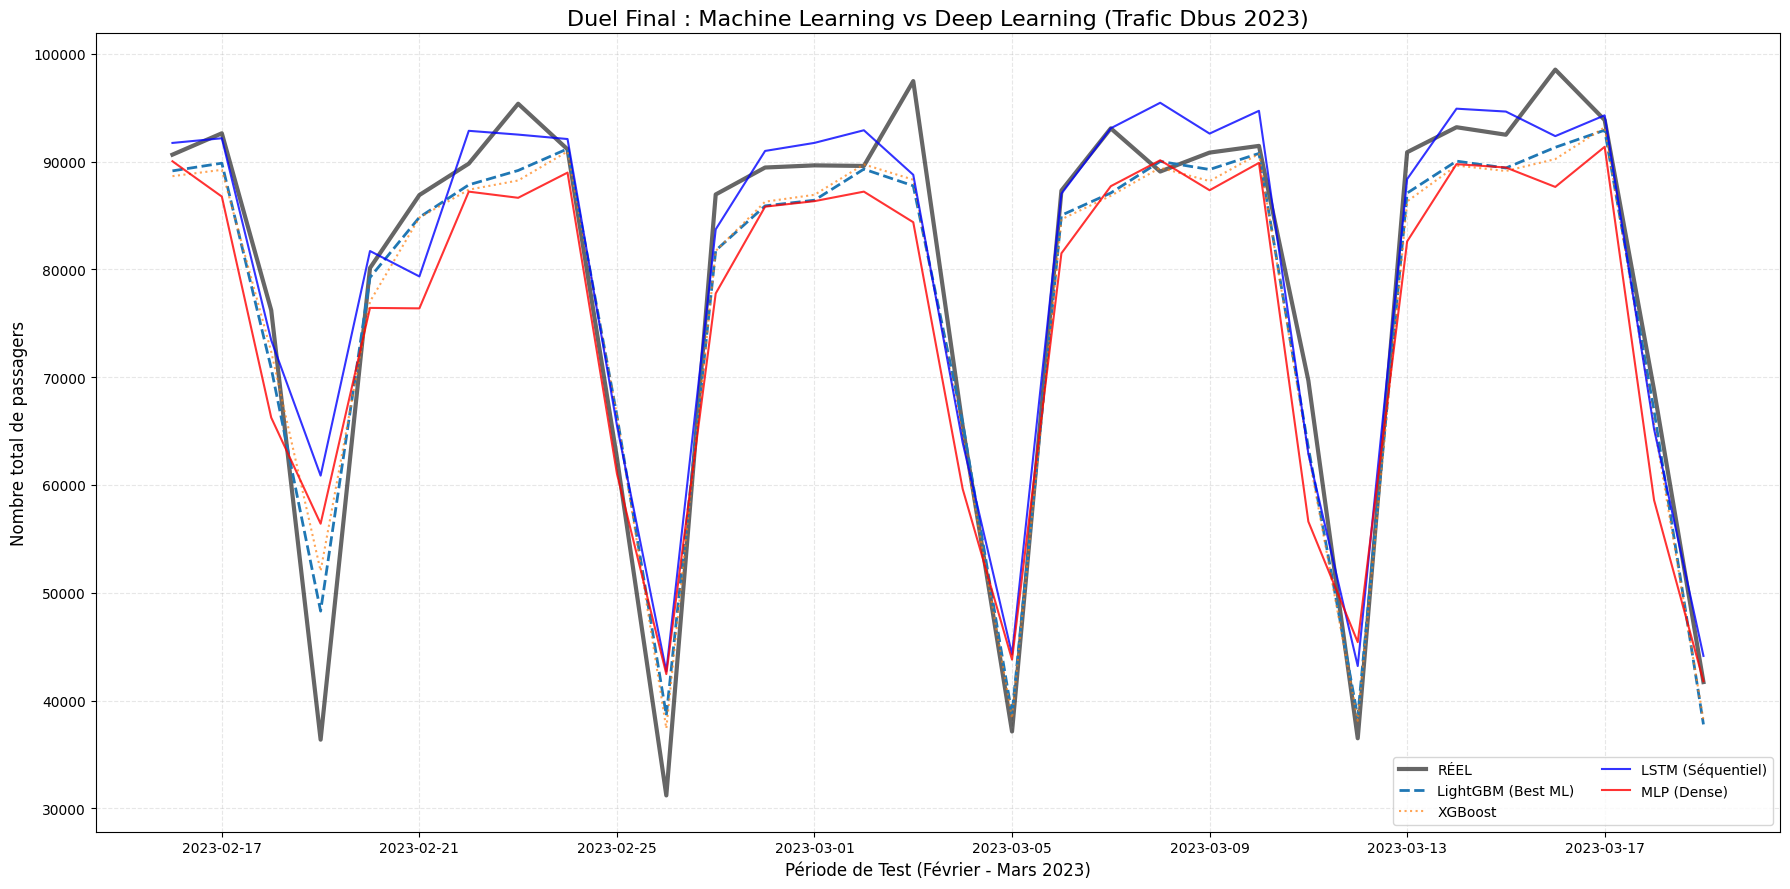

In [166]:
import matplotlib.pyplot as plt

# 1. Préparation des données agrégées par jour
# On combine toutes les prédictions dans un seul DataFrame
df_comparaison_totale = pd.DataFrame({
    'Date': df_test['dateTime'].values,
    'Réel': y_test.values,
    'LightGBM': y_pred_lgb,
    'XGBoost': y_pred_test,
    'LSTM': y_pred_lstm.flatten(),
    'MLP': y_pred_mlp.flatten()
})

# Somme par jour pour l'ensemble du réseau
daily_summary = df_comparaison_totale.groupby('Date').sum()

# 2. Création du graphique
plt.figure(figsize=(18, 9))

# Référence Réelle
plt.plot(daily_summary.index, daily_summary['Réel'], label='RÉEL', color='black', linewidth=3, alpha=0.6)

# Modèles ML (Tirés de tes résultats : LightGBM est le champion ML)
plt.plot(daily_summary.index, daily_summary['LightGBM'], label='LightGBM (Best ML)', linestyle='--', linewidth=2)
plt.plot(daily_summary.index, daily_summary['XGBoost'], label='XGBoost', linestyle=':', alpha=0.7)

# Modèles DL (Tirés de ton dernier graphe)
plt.plot(daily_summary.index, daily_summary['LSTM'], label='LSTM (Séquentiel)', color='blue', alpha=0.8)
plt.plot(daily_summary.index, daily_summary['MLP'], label='MLP (Dense)', color='red', alpha=0.8)

# Mise en forme pour le mémoire
plt.title("Duel Final : Machine Learning vs Deep Learning (Trafic Dbus 2023)", fontsize=16)
plt.ylabel("Nombre total de passagers", fontsize=12)
plt.xlabel("Période de Test (Février - Mars 2023)", fontsize=12)
plt.legend(loc='lower right', fontsize=10, ncol=2)
plt.grid(True, which='both', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [167]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Calcul des métriques pour les modèles de Deep Learning
# (Assure-toi que y_pred_lstm et y_pred_mlp ont été dé-normalisés avec inverse_transform)
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
rmse_ensemble = np.sqrt(mean_squared_error(y_test, y_pred_final))

# 2. Création du DataFrame global
final_leaderboard = pd.DataFrame({
    'Famille': ['ML (Boosting)', 'ML (Bagging)', 'ML (Boosting)', 'Deep Learning', 'Deep Learning', 'Ensemble'],
    'Modèle': ['XGBoost', 'Random Forest', 'LightGBM', 'LSTM', 'MLP', 'Moyenne des 3 (ML)'],
    'MAE': [mae_test, mae_rf, mae_lgb, mae_lstm, mae_mlp, mae_final],
    'RMSE': [rmse_test, rmse_rf, rmse_lgb, rmse_lstm, rmse_mlp, rmse_ensemble],
    'R² Score': [r2_test, r2_rf, r2_lgb, r2_lstm, r2_mlp, r2_final]
})

# 3. Tri par RMSE (la métrique la plus punitive pour les grosses erreurs)
final_leaderboard = final_leaderboard.sort_values(by='RMSE').reset_index(drop=True)

# 4. Affichage avec style
print("LEADERBOARD FINAL DU PROJET DBUS - SAN SEBASTIÁN")
display(final_leaderboard.style.highlight_min(subset=['MAE', 'RMSE'], color='lightgreen') \
                          .highlight_max(subset=['R² Score'], color='lightgreen'))

LEADERBOARD FINAL DU PROJET DBUS - SAN SEBASTIÁN


,Famille,Modèle,MAE,RMSE,R² Score
0,ML (Boosting),LightGBM,176.242045,350.014278,0.983993
1,Ensemble,Moyenne des 3 (ML),180.154922,364.951828,0.982598
2,ML (Boosting),XGBoost,188.727753,371.587809,0.981959
3,ML (Bagging),Random Forest,191.390128,406.677561,0.978391
4,Deep Learning,LSTM,233.968521,430.021656,0.975839
5,Deep Learning,MLP,287.070770,476.500033,0.970334


## ConclusionConclusion : Optimisation de la Prédiction de Trafic

Cette étude comparative, menée sur le premier trimestre 2023, démontre la haute prédictibilité du trafic de passagers grâce à l'intégration de variables temporelles et historiques (Lags). L'analyse de performance de cinq architectures distinctes a permis de dégager les enseignements suivants :

1. **Hiérarchie des PerformancesLe Champion (LightGBM)** : Avec un $R^2$ de 0,9840 et un RMSE de 350, LightGBM s'impose comme le modèle le plus précis. Sa gestion native des variables catégorielles (lignes de bus) et sa croissance par feuilles lui permettent de mieux capter les variations fines que les autres modèles d'arbres.Apport du Deep Learning : Le modèle LSTM, bien que très performant, ne surpasse pas significativement le Gradient Boosting sur ce jeu de données tabulaires. Toutefois, le graphique démontre sa capacité supérieure à suivre la dynamique des pics de milieu de semaine là où les modèles de ML classiques ont tendance à sous-estimer légèrement la charge.

2. **Analyse des Limites et Résilience** : Le graphique met en évidence une chute de trafic atypique aux alentours du 26 février. La convergence de tous les modèles vers une erreur commune à cette date indique un événement externe non documenté dans le dataset (incident réseau ou événement local). Cela souligne que, bien que les modèles soient robustes à 98%, la précision ultime dépend de l'intégration future de données contextuelles en temps réel.

3. **Recommandation Stratégique**: Pour une mise en production, le modèle LightGBM est recommandé pour son excellent rapport précision/ressources calculatoires. L'utilisation d'une approche d'ensemble (moyennant les prédictions) reste une alternative viable pour lisser les incertitudes et garantir une stabilité maximale des prévisions opérationnelles.

## Exemple de prédiction du trafic des 3 prochains jours avec LightGBM

In [160]:
import pandas as pd
import numpy as np

def predict_next_3_days(model, last_known_row, features_list, X_train_dtypes):
    predictions = []
    current_data = last_known_row.copy()

    for i in range(1, 4):
        # 1. Préparation des features pour le jour J+i
        current_data['dateTime'] = current_data['dateTime'] + pd.Timedelta(days=1)
        current_data['day_of_week_num'] = current_data['dateTime'].dayofweek
        current_data['is_weekend'] = 1 if current_data['day_of_week_num'] >= 5 else 0
        current_data['month'] = current_data['dateTime'].month # Also update month

        # 2. Mise à jour des Lags (Le plus important)
        if i > 1:
            current_data['passengersNumber_of_yesterday'] = predictions[-1]
        else:
            current_data['passengersNumber_of_yesterday'] = last_known_row['passengersNumber']

        current_data['passengers_J_minus_7'] = last_known_row['passengers_J_minus_7']
        current_data['moyenne_traffic_sur_7j'] = last_known_row['moyenne_traffic_sur_7j']
        current_data['moyenne_traffic_sur_30j'] = last_known_row['moyenne_traffic_sur_30j']

        # 3. Sélection des features pour le modèle
        X_input = current_data[features_list].to_frame().T

        for col in features_list:
            if col in X_train_dtypes:
                if X_train_dtypes[col].name == 'category':
                    X_input[col] = pd.Categorical(X_input[col], categories=X_train_dtypes[col].categories)
                elif X_train_dtypes[col].kind == 'b': # boolean
                    X_input[col] = X_input[col].astype(bool)
                elif X_train_dtypes[col].kind in ['i', 'u']: # integer
                    X_input[col] = X_input[col].astype(int)
                elif X_train_dtypes[col].kind == 'f': # float
                    X_input[col] = X_input[col].astype(float)
        # ------------------------------------------------------------------

        # 4. Prédiction
        pred = model.predict(X_input)[0]
        predictions.append(max(0, pred)) # On évite les prédictions négatives

        print(f"Jour {i} ({current_data['dateTime'].date()}) : {int(pred)} passagers prédits")

    return predictions

# --- Utilisation ---
# On prend la toute dernière ligne de ton dataset de test pour une ligne de bus spécifique (ex: Ligne 28)
last_row_bus_28 = df_test[df_test['lineNumber'] == 28].iloc[-1]

X_train_dtypes = X_train.dtypes

next_3_days = predict_next_3_days(lgb_model, last_row_bus_28, features, X_train_dtypes)


Jour 1 (2023-03-20) : 10113 passagers prédits
Jour 2 (2023-03-21) : 11156 passagers prédits
Jour 3 (2023-03-22) : 11282 passagers prédits


In [165]:
def compare_prediction_real(target_date, line_number, model, df_source, features_list, dtypes):
    # 1. Trouver la ligne de départ (le "dernier jour connu" avant la prédiction)
    target_date = pd.to_datetime(target_date)

    # On récupère les données de la ligne choisie jusqu'à la date cible
    df_line = df_source[df_source['lineNumber'] == line_number].sort_values('dateTime')

    if target_date not in df_line['dateTime'].values:
        return "Date non trouvée dans le dataset de test."

    # La ligne de départ est celle juste AVANT les 3 jours à prédire
    start_row = df_line[df_line['dateTime'] == target_date].iloc[0]

    # 2. Lancer la prédiction récursive sur 3 jours
    # On utilise ta fonction predict_next_3_days
    preds = predict_next_3_days(model, start_row, features_list, dtypes)

    # 3. Récupérer les vraies valeurs pour ces 3 jours
    comparison_list = []
    for i in range(1, 4):
        future_date = target_date + pd.Timedelta(days=i)
        real_val_row = df_line[df_line['dateTime'] == future_date]

        real_val = real_val_row['passengersNumber'].values[0] if not real_val_row.empty else np.nan

        comparison_list.append({
            'Jour': i,
            'Date': future_date.date(),
            'Réel': real_val,
            'Prédit': int(preds[i-1]),
            'Écart Absolu': abs(real_val - int(preds[i-1])) if not np.isnan(real_val) else "N/A"
        })

    return pd.DataFrame(comparison_list)



In [164]:
# --- EXÉCUTION ---
date_choisie = '2023-03-15' # Exemple : on se place le 15 mars pour prédire le 16, 17, 18
ligne_bus = 28

resultat = compare_prediction_real(date_choisie, ligne_bus, lgb_model, df_test, features, X_train_dtypes)
display(resultat)

Jour 1 (2023-03-16) : 11102 passagers prédits
Jour 2 (2023-03-17) : 10597 passagers prédits
Jour 3 (2023-03-18) : 7742 passagers prédits


,Jour,Date,Réel,Prédit,Écart Absolu
0,1,2023-03-16,13805,11102,2703
1,2,2023-03-17,11766,10597,1169
2,3,2023-03-18,7845,7742,103
